## Copy anatomical files

The goal of this notebook is to copy a subset of the anatomical MRI files, i.e. the T1s, which will be needed down the road for a control analysis. 

Note: As for the previous notebook, this step can only be reproduced via the notebook if you have the raw data in place.


#### Import modules

In [1]:
import pandas as pd
import os, itertools, random
import numpy as np
from nilearn.masking import compute_brain_mask
#!pip install nilearn --upgrade
from nilearn import image
from nilearn.masking import apply_mask 
#compute_brain_mask

#### Load the participants-file and the available session-2 movie-viewing data

In [2]:
df = pd.read_csv('../../data/00_dataset_info/participants.tsv', sep='\t')
df.head()

subs_extracted = [f[:8] for f in os.listdir('../../data/03_extract_ts_aus/') if f.startswith('sub')]
print(subs_extracted[:5])

f = df[df['participant_id'].isin(subs_extracted)]
f.head()

['sub-0306', 'sub-0092', 'sub-0256', 'sub-0325', 'sub-0232']


,participant_id,family_id,age,age_ses02,sex,handedness,ses01_protocol,ses02_protocol,group
0,sub-0001,fam-0001,12,14.0,M,Right,1b,2b,NaN
2,sub-0003,fam-0116,12,14.0,M,Right,1d,2c,NaN
3,sub-0004,fam-0002,10,11.0,M,Right,1d,2c,NaN
4,sub-0005,fam-0088,10,12.0,F,Right,1d,2c,NaN
5,sub-0006,fam-0178,13,15.0,M,Right,1b,2a,NaN


#### Select the twins and copy their anatomical files

In [3]:
twin_list = []

for i in range(len(f)):
    current_family = f.iloc[i, :]['family_id']
    curr_dyad      = f[f['family_id'] == current_family]['participant_id'].values
    if (curr_dyad.shape[0] == 2):
        twin_list.append(list(curr_dyad))
        
print(len(twin_list))

twin_list.sort()
twin_list = list(twin_list for twin_list,_ in itertools.groupby(twin_list))

print(len(twin_list))

276
138


In [4]:
# commented out here because it can only be reproduced if the raw files are in place

''' #import shutil
for current_dyad in range(len(twin_list)):
        print(twin_list[current_dyad])
        
        #file_a = twin_list[current_dyad][0]
        #source_path_a = '/Volumes/Backup Plus/twins_fmriprep/' + file_a + '/ses-02/anat/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        #dest_path_a = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        #shutil.copyfile(source_path_a, dest_path_a)
        
        file_a = twin_list[current_dyad][0]
        source_path_a = '/Volumes/Backup Plus/twins_fmriprep/' + file_a + '/ses-02/anat/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        dest_path_a = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        shutil.copyfile(source_path_a, dest_path_a)
        
        #file_b = twin_list[current_dyad][1]
        #source_path_b = '/Volumes/Backup Plus/twins_fmriprep/' + file_b + '/ses-02/anat/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        #dest_path_b = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        #shutil.copyfile(source_path_b, dest_path_b)
        
        file_b = twin_list[current_dyad][1]
        source_path_b = '/Volumes/Backup Plus/twins_fmriprep/' + file_b + '/ses-02/anat/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        dest_path_b = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        shutil.copyfile(source_path_b, dest_path_b)# '''
print('n')

n


### testing to set up some correlation of anatomical similarity values

In [7]:
for current_dyad in range(1):
        print(twin_list[current_dyad])
        
        file_a = twin_list[current_dyad][0]
        file_b = twin_list[current_dyad][1]

['sub-0001', 'sub-0018']


In [8]:
twin_list[5]

['sub-0007', 'sub-0048']

In [9]:
file_o = 'sub-0007'

In [10]:
f1 = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
f1m = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

f2 = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
f2m = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))


fo = '../../data/04_anatomy/' + file_o + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
fom = '../../data/04_anatomy/' + file_o + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
fo_masked = apply_mask(fo, compute_brain_mask(fom, threshold=0.01, mask_type='whole-brain'))


#f1m_img = image.load_img(f1m)
#f1m_data = f1_img.get_fdata()
#print(f1m_data.shape)

#f1_img = image.load_img(f1)
#f1_data = f1_img.get_fdata()
#print(f1_data.shape)

#f2_img = image.load_img(f2)
#f2_data = f2_img.get_fdata()
#print(f2_data.shape)

In [11]:
print(f1_masked.shape)
print(f2_masked.shape)
print(fo_masked.shape)

(3754338,)
(3754338,)
(3754338,)


In [12]:
print(np.corrcoef(f1_masked, f2_masked)[0,1])
print(np.corrcoef(f1_masked, fo_masked)[0,1])
print(np.corrcoef(f2_masked, fo_masked)[0,1])

0.7421049427070661
0.7275087445841587
0.7334759618501598


In [13]:
print(np.corrcoef(f1_masked, f1_masked)[0,1])


0.9999999999999999


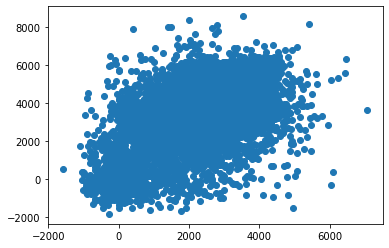

In [14]:
import matplotlib.pyplot as plt
plt.scatter(f1_masked[50000:70000], f2_masked[50000:70000])